In [1]:
import os
import shutil
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
original_dataset_dir =r"C:\Users\Ceeva\Desktop\Github\ComputerVision-DL\train"
base_dir = r"C:\Users\Ceeva\Desktop\Github\ComputerVision-DL\cats_and_dogs_small"


# Creating three directories for training, validation and testing
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


# Directory with training cat and dogs pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')


# Directory with validation cat and dogs pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


# Directory with testing cat and dogs pictures
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')


In [3]:
# Seperating 1000 cats and dogs images for training
# Seperating 500 cats and dogs images for training
# Seperating 500 cats and dogs images for training
"""
fnames = ['cat.{}.jpg'.format(i) for i in range(10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(10000, 11500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(11500, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(10000, 11500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(11500, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
"""

"\nfnames = ['cat.{}.jpg'.format(i) for i in range(10000)]\nfor fname in fnames:\n    src = os.path.join(original_dataset_dir, fname)\n    dst = os.path.join(train_cats_dir, fname)\n    shutil.copyfile(src, dst)\n\nfnames = ['cat.{}.jpg'.format(i) for i in range(10000, 11500)]\nfor fname in fnames:\n    src = os.path.join(original_dataset_dir, fname)\n    dst = os.path.join(validation_cats_dir, fname)\n    shutil.copyfile(src, dst)\n\nfnames = ['cat.{}.jpg'.format(i) for i in range(11500, 12500)]\nfor fname in fnames:\n    src = os.path.join(original_dataset_dir, fname)\n    dst = os.path.join(test_cats_dir, fname)\n    shutil.copyfile(src, dst)\n\nfnames = ['dog.{}.jpg'.format(i) for i in range(10000)]\nfor fname in fnames:\n    src = os.path.join(original_dataset_dir, fname)\n    dst = os.path.join(train_dogs_dir, fname)\n    shutil.copyfile(src, dst)\n\nfnames = ['dog.{}.jpg'.format(i) for i in range(10000, 11500)]\nfor fname in fnames:\n    src = os.path.join(original_dataset_dir, 

In [4]:
# Building the network

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [6]:
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [7]:
# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('C:\\Users\\Ceeva\\Desktop\\Github\\ComputerVision-DL\\cats_and_dogs_small\\train',
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory('C:\\Users\\Ceeva\\Desktop\\Github\\ComputerVision-DL\\cats_and_dogs_small\\validation',
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')


Found 20000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


In [8]:
# Data Generators to feed data into the fit_generator function
train_datagen = ImageDataGenerator(
                                rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,)

train_generator = train_datagen.flow_from_directory(
                                train_dir,
                                target_size=(150, 150),
                                batch_size=32,
                                class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                                validation_dir,
                                target_size=(150, 150),
                                batch_size=32,
                                class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


In [9]:
history = model.fit_generator(
                                train_generator,
                                steps_per_epoch=100,
                                epochs=100,
                                validation_data=validation_generator,
                                validation_steps=50
                                )

Epoch 1/100
100/100 [==============================] - 90s 903ms/step - loss: 0.6908 - acc: 0.5278 - val_loss: 0.6745 - val_acc: 0.5913
Epoch 2/100
100/100 [==============================] - 88s 877ms/step - loss: 0.6730 - acc: 0.5822 - val_loss: 0.6533 - val_acc: 0.6062
Epoch 3/100
100/100 [==============================] - 84s 842ms/step - loss: 0.6692 - acc: 0.5859 - val_loss: 0.6354 - val_acc: 0.5281
Epoch 4/100
100/100 [==============================] - 83s 832ms/step - loss: 0.6580 - acc: 0.6031 - val_loss: 0.6805 - val_acc: 0.6024
Epoch 5/100
100/100 [==============================] - 82s 819ms/step - loss: 0.6461 - acc: 0.6244 - val_loss: 0.7230 - val_acc: 0.6194
Epoch 6/100
100/100 [==============================] - 82s 816ms/step - loss: 0.6453 - acc: 0.6216 - val_loss: 0.6075 - val_acc: 0.6828
Epoch 7/100
100/100 [==============================] - 77s 766ms/step - loss: 0.6191 - acc: 0.6522 - val_loss: 0.6089 - val_acc: 0.6875
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 76s 756ms/step - loss: 0.4691 - acc: 0.7713 - val_loss: 0.2547 - val_acc: 0.8166
Epoch 62/100
100/100 [==============================] - 76s 757ms/step - loss: 0.4820 - acc: 0.7706 - val_loss: 0.5378 - val_acc: 0.8231
Epoch 63/100
100/100 [==============================] - 76s 758ms/step - loss: 0.4450 - acc: 0.7878 - val_loss: 0.2695 - val_acc: 0.8078
Epoch 64/100
100/100 [==============================] - 76s 757ms/step - loss: 0.4682 - acc: 0.7794 - val_loss: 0.5064 - val_acc: 0.8141
Epoch 65/100
100/100 [==============================] - 76s 758ms/step - loss: 0.4771 - acc: 0.7756 - val_loss: 0.2706 - val_acc: 0.8331
Epoch 66/100
100/100 [==============================] - 76s 757ms/step - loss: 0.4572 - acc: 0.7950 - val_loss: 0.3557 - val_acc: 0.8273
Epoch 67/100
100/100 [==============================] - 77s 765ms/step - loss: 0.4681 - acc: 0.7769 - val_loss: 0.4382 - val_acc: 0.8350
Epoch 68/100
100/100 [===================

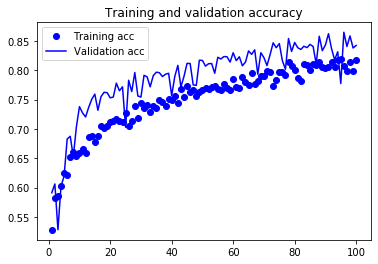

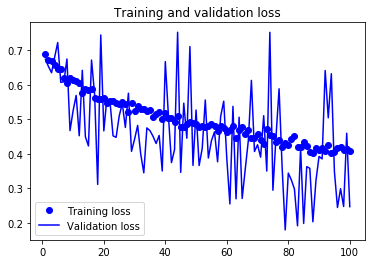

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()